## Init

In [302]:
import numpy as np
from matplotlib import pyplot as plt

samples = 2 ** 7
epsilon = 10**-4
zmin, zmax = -20, 20
rhomin, rhomax = 0, 20
phimin, phimax = -np.pi, np.pi

phirange = np.linspace(phimin, phimax, num=samples)
rhorange = np.linspace(rhomin, rhomax, num=samples)
zrange = np.linspace(zmin, zmax, num=samples)

dz = zrange[1] - zrange[0]
dphi = phirange[1] - phirange[0]
drho = rhorange[1] - rhorange[0]

rho, phi, z = np.meshgrid(rhorange, phirange, zrange, indexing='ij')

zero = np.zeros_like(z)

orts_vec = np.array([rho*np.cos(phi), rho*np.sin(phi), z]) # ortsvektor (x,y)
#orts_vecXZ = np.array([x, z]) # ortsvektor (x,z)


## Helperfunctions

In [303]:
def integral(integrant,range,shape):
    out = np.zeros(shape)
    dx = range[1] - range[0]
    for x in range:
        out += integrant(x)*dx
    return out

def plot3d(x,y,z,u,v,w):
    ax = plt.figure(figsize=(6,6)).add_subplot(projection="3d")
    ax.quiver(x,y,z,u,v,w,length=0.5)
    plt.show()

def myQuiver(x,y,u,v,ax,scale=1,xlabel="X",ylabel="Y",title="Plot"):
    ax.quiver(x,y,u,v,scale=scale)
    [ax.set_title(title),ax.set_xlabel(xlabel),ax.set_ylabel(ylabel)]

def myImshow(x,ax,xlabel="X",ylabel="Y",title="Plot",extent=None):
    p=ax.imshow(x,extent=extent)
    [ax.set_title(title),ax.set_xlabel(xlabel),ax.set_ylabel(ylabel)]
    plt.colorbar(p)

def plot3dVectField(points, arrows, n_arrows=5,scale=1,):
    div = samples//n_arrows
    point_x,point_y,point_z = points[::,::div,::div,::div]
    hres_rho,hres_phi,hres_z = arrows

    arrow= arrows[::,::div,::div,::div]
    arrow_x,arrow_y,arrow_z = arrow
    arrow_xn,arrow_yn,arrow_zn =arrow/(np.linalg.norm(arrow,axis=0))
    plot3d(point_x,point_y,point_z,arrow_x,arrow_y,arrow_z)
    mid_index = len(point_x)//2
    sp = plt.subplot()
    myQuiver(point_x[::,mid_index,::],point_z[::,mid_index,::], 
                arrow_xn[::,mid_index,::],arrow_zn[::,mid_index,::],scale=scale,
                ax=sp, xlabel="Rho",ylabel="Z",title="RhoZ-Quiver")
    plt.show()
    """sp = plt.subplot(projection="polar")
    p = sp.pcolormesh(phi[::,::,mid_index],rho[::,::,mid_index],circuit_phi[::,::,mid_index])
    plt.colorbar(p)
    plt.show()"""
    #f = plt.figure(figsize=(12, 6))
    fig,(sp1,sp2) = plt.subplots(1,2,figsize=(12, 6))
    sp1.set_title("Feld Rho Component in (Rho Z Plane)")
    sp1.set_xlabel("Rho")
    p1 = sp1.imshow(-hres_rho[::,30,::].T,extent=(rhomin,rhomax,zmin,zmax),origin="lower")
    
    plt.colorbar(p1)
    sp2.set_title("Feld Z-Component in (Rho Z Plane)")
    sp2.set_xlabel("Rho")
    p2 = sp2.imshow(hres_z[::,30,::].T,extent=(rhomin,rhomax,zmin,zmax),origin="lower")
    plt.colorbar(p2)
    plt.tight_layout()
    plt.show()

# Magnetostatisches Feld eines Linienstroms

$$ \vec{r'} = \begin{bmatrix} 
                v_1 \\ 
                v_2 \\ 
                v_3 
            \end{bmatrix}
 $$

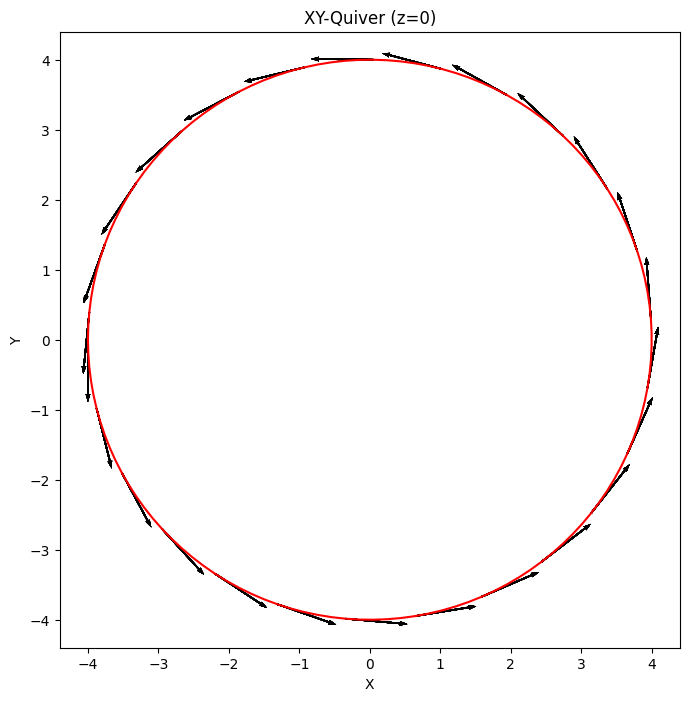

In [304]:
R = 4 # = Radius des Stroms
I = 20

def r(_phi, R , z=0): # Orts Kurve
    return R*np.array([np.cos(_phi), np.sin(_phi), np.zeros_like(_phi)+z])

def j(_phi, I,z=0): # Stromdichte 
    return I*np.array([-np.sin(_phi), np.cos(_phi), np.zeros_like(_phi)+z])

ortskurve = r(phi, R)
stromdichte = j(phi, I) # Stromdichte

kurve_x, kurve_y, _ = r(phirange, R)
f = plt.figure(figsize=(8, 8))
sp = plt.subplot()
sp.plot(kurve_x, kurve_y, scalex=1, scaley=1, color="red")
scale=200
div = samples//25
point_x,point_y,point_z  = ortskurve[::, ::div, ::div,::div]
arrow_x,arrow_y,arrow_z = stromdichte[::, ::div, ::div,::div]
mid_index = len(point_x)//2

myQuiver(point_x[::,::,mid_index],point_y[::,::,mid_index], 
            arrow_x[::,::,mid_index],arrow_y[::,::,mid_index],scale=scale,
            ax=sp, xlabel="X",ylabel="Y",title="XY-Quiver (z=0)")

#plt.tight_layout()
plt.show()



# Feld auf der Z - Achse (zx ebene)

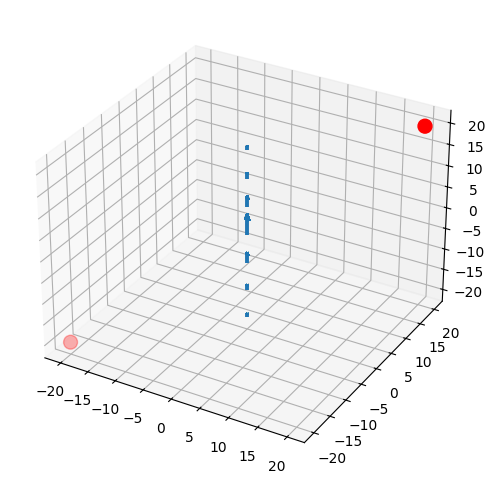

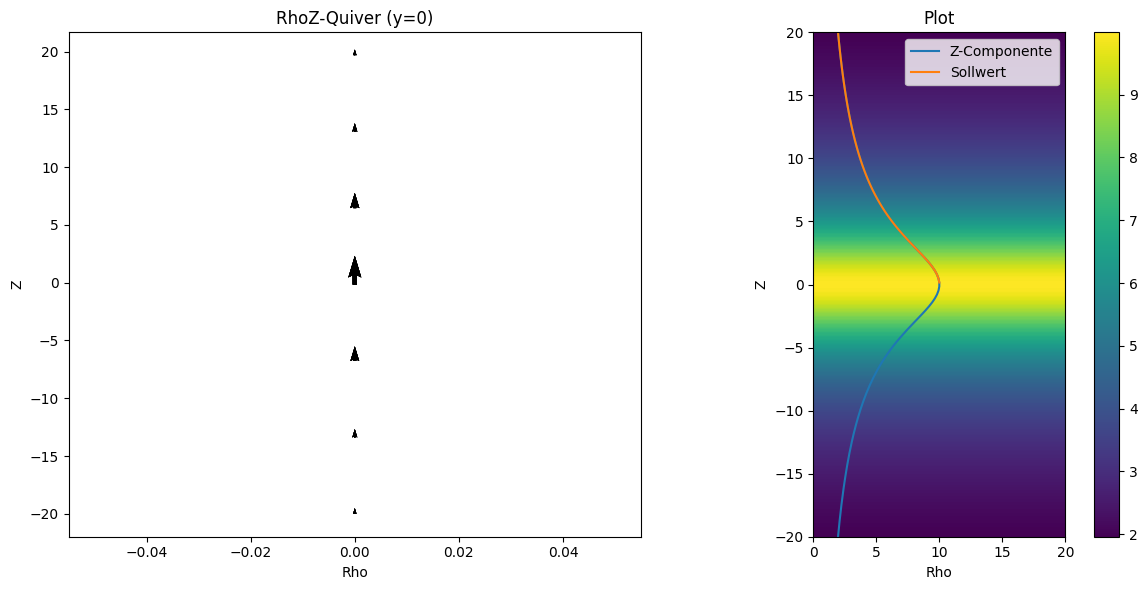

In [305]:

div = samples//6
field_z = np.array([zero,zero,I*R/(2*np.sqrt(R**2+z**2))])
point_x,point_y,point_z  = np.array([zero,zero,z])[::,::div,::div,::div]
arrow_x,arrow_y,arrow_z = field_z[::,::div,::div,::div]

ax = plt.figure(figsize=(6,6)).add_subplot(projection="3d")
ax.quiver(point_x,point_y,point_z,arrow_x,arrow_y,arrow_z,length=0.5)
ax.scatter([zmin,zmax],[zmin,zmax],[zmin,zmax],color="red",s=100)
plt.show()

mid_index = len(point_x)//2
fig, (tl,tr) = plt.subplots(1,2,figsize=[12,6])


myQuiver(point_x[::,mid_index,::],point_z[::,mid_index,::],
            arrow_x[::,mid_index,::],arrow_z[::,mid_index,::],scale=scale,
            ax=tl,xlabel="Rho",ylabel="Z",title="RhoZ-Quiver (y=0)")

myImshow(field_z[2][::,mid_index,::].T,tr,xlabel="Rho",ylabel="Z",extent=(rhomin,rhomax,zmin,zmax))
p1  = plt.plot(field_z[2][0,0,::],z[0,0,::])

shouldbe = I*R/(2*np.sqrt(R**2+z[0,0,::]**2))
p2 = plt.plot(shouldbe[samples//2::],z[0,0,samples//2::])
plt.legend([p1[0],p2[0]],["Z-Componente","Sollwert"])
plt.tight_layout()
plt.show()

# Potenzial

In [306]:
plt.figure(figsize=(6, 6))
def potenzial(r,j):
    def potenzial_integrant(_phi):
        curveN_x, curveN_y, curveN_z = r(_phi) # Ortsvektor auf der Stromkurve
        stromdichteN_x, stromdichteN_y, stromdichteN_z = j(_phi) # Stromdichte auf der Stromkurve
        orts_vec_x, orts_vec_y, orts_vec_z = orts_vec # Ortsvektor auf dem Gitter
        # orts_vec-curve =
        distance = epsilon+np.sqrt((orts_vec_x-curveN_x)**2+(orts_vec_y-curveN_y)**2+(orts_vec_z-curveN_z)**2)
        return np.array([stromdichteN_x/distance,stromdichteN_y/distance,stromdichteN_z/distance])
    return integral(potenzial_integrant, phirange, orts_vec.shape)

circuit_potential = potenzial(lambda phi:r(phi,R),lambda phi:j(phi,I))
circuit_phi = np.atan2(circuit_potential[1],circuit_potential[0])
circuit_rho = np.sqrt(circuit_potential[0]**2+circuit_potential[1]**2)
circuit_z = circuit_potential[2]
div = samples//10
point_x,point_y,point_z = orts_vec[::,::div,::div,::div]
arrow_x,arrow_y,arrow_z = circuit_potential[::,::div,::div,::div]


<Figure size 600x600 with 0 Axes>

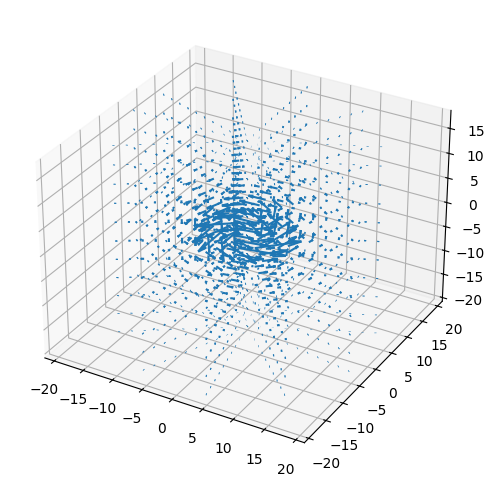

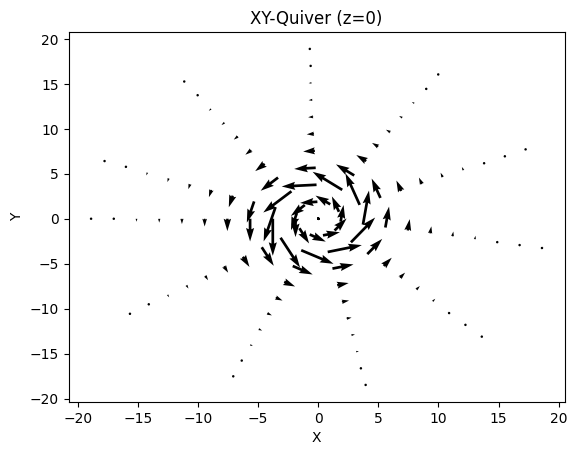

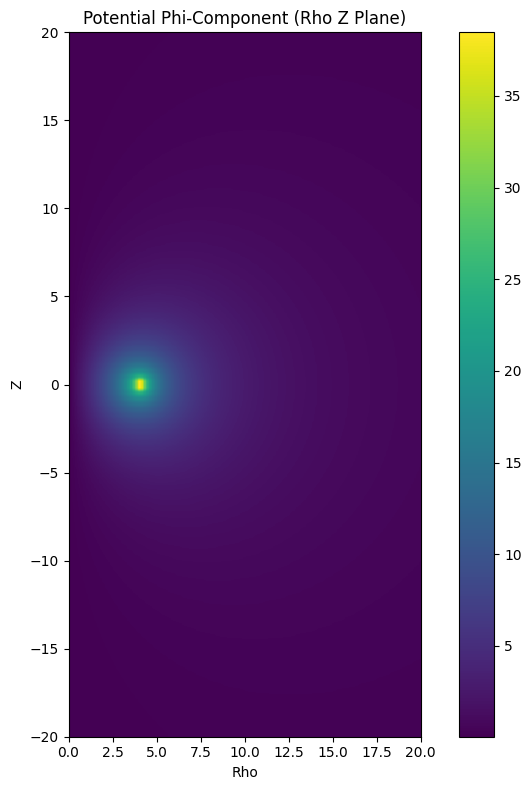

In [307]:
scale = 200
plot3d(point_x,point_y,point_z,arrow_x,arrow_y,arrow_z)
mid_index = len(point_x)//2
sp = plt.subplot()
myQuiver(point_x[::,::,mid_index],point_y[::,::,mid_index], 
            arrow_x[::,::,mid_index],arrow_y[::,::,mid_index],scale=scale,
            ax=sp, xlabel="X",ylabel="Y",title="XY-Quiver (z=0)")
plt.show()
"""sp = plt.subplot(projection="polar")
p = sp.pcolormesh(phi[::,::,mid_index],rho[::,::,mid_index],circuit_phi[::,::,mid_index])
plt.colorbar(p)
plt.show()"""
# ratio 1:1
f, sp = plt.subplots(1,1,figsize=[8,8])
sp.set_title("Potential Phi-Component (Rho Z Plane)")
p = sp.imshow(circuit_rho[::,0,::].T,extent=(rhomin,rhomax,zmin,zmax),origin="lower")
sp.set_xlabel("Rho")
sp.set_ylabel("Z")
plt.colorbar(p)
plt.tight_layout()
plt.show()

Das Bild zeigt die Intensität des Potenzials auf der Rho Z Ebene in Phi Richtung.

Der gelbe Punkt ist der Schnittpunkt mit dem Leiter.

# Feld


In [308]:
def field(_r,_j,parameter_range):
    def field_integrant(_phi):
        curveN_x, curveN_y, curveN_z = _r(_phi) # Ortsvektor auf der Stromkurve
        orts_vec_x, orts_vec_y, orts_vec_z = orts_vec
        to_point = np.array([orts_vec_x-curveN_x, orts_vec_y-curveN_y, orts_vec_z-curveN_z])
        distance = np.linalg.norm(to_point,axis=0)
        scale = 1/(distance**3+epsilon)
        cr_x,cr_y,cr_z = np.cross(_j(_phi), to_point, axis=0)
        return np.array([cr_x*scale,cr_y*scale, cr_z*scale])
    return integral(field_integrant, parameter_range, orts_vec.shape)

circuit_field_rho, circuit_field_phi, circuit_field_z = circuit_field = field(lambda _phi: r(_phi,R), lambda _phi: j(_phi,I),phirange)


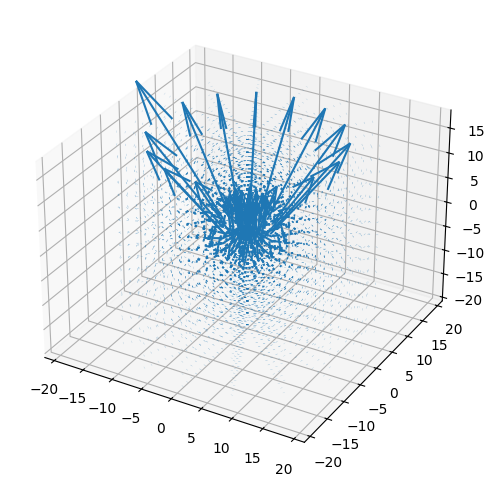

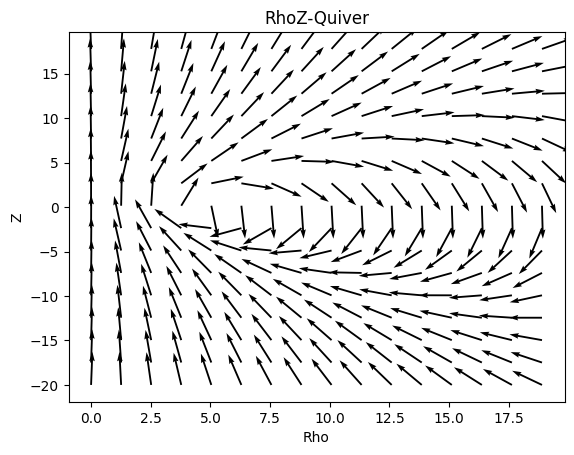

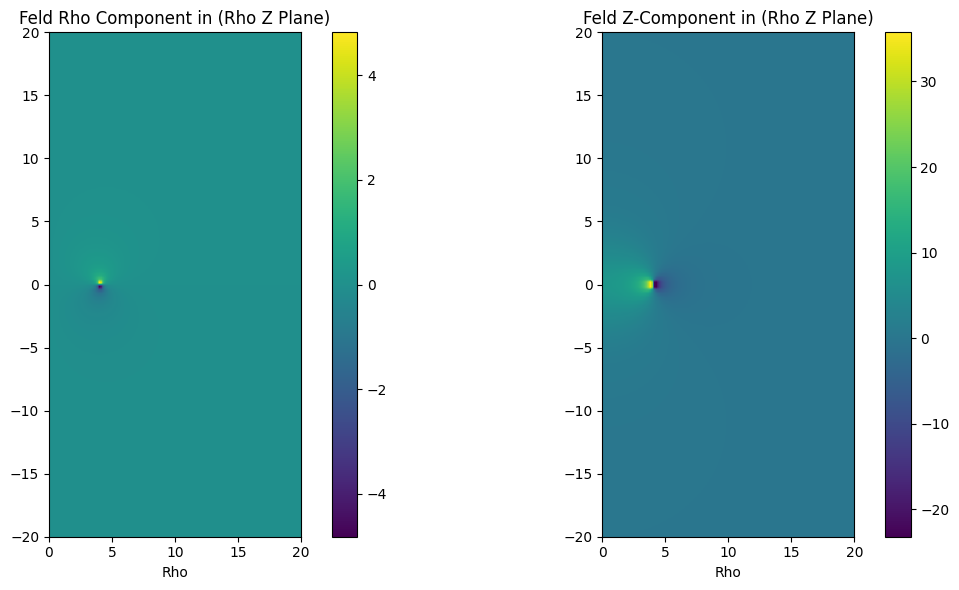

In [309]:

plot3dVectField(orts_vec,circuit_field,n_arrows=15,scale=15)



# Feld auf der Z Achse Numerisch

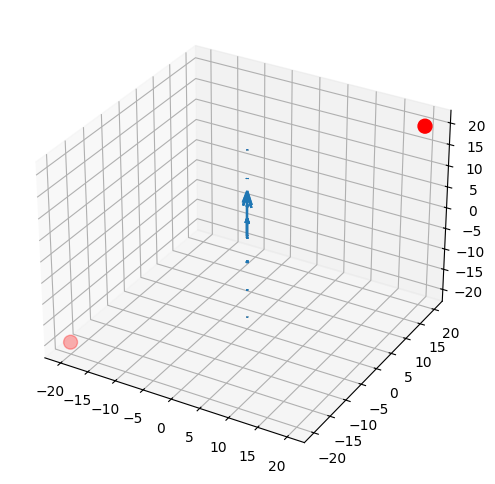

C:\Users\guita\AppData\Local\Temp\ipykernel_2600\3268109851.py:20: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 4 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(p)


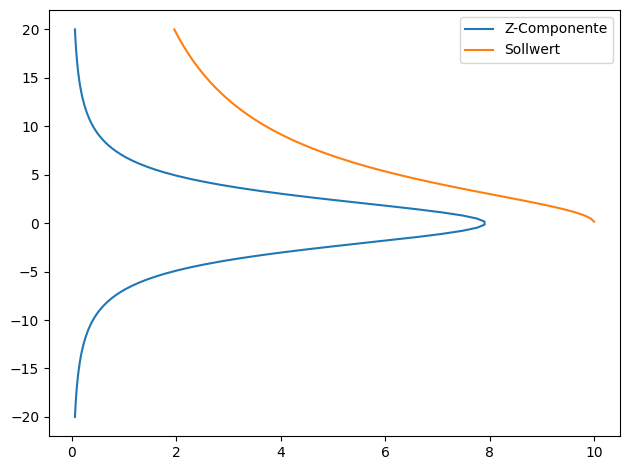

In [310]:
div = samples//6

point_x,point_y,point_z  = np.array([zero,zero,z])[::,::div,::div,::div]
arrow_x,arrow_y,arrow_z = np.array([zero,zero,circuit_field_z])[::,::div,::div,::div]
mid_index = len(point_x)//2
ax = plt.figure(figsize=(6,6)).add_subplot(projection="3d")
ax.quiver(point_x,point_y,point_z,arrow_x,arrow_y,arrow_z,length=0.5)
ax.scatter([zmin,zmax],[zmin,zmax],[zmin,zmax],color="red",s=100)
plt.show()
myQuiver(point_x[::,mid_index,::],point_z[::,mid_index,::],
            arrow_x[::,mid_index,::],arrow_z[::,mid_index,::],scale=scale,
            ax=tl,xlabel="X",ylabel="Z",title="XZ-Quiver (y=0)")

myImshow(circuit_field_z[::,mid_index,::].T,tr,xlabel="Rho",ylabel="Z",extent=(rhomin,rhomax,zmin,zmax))
p1  = plt.plot(circuit_field_z[0,0,::],z[0,0,::])

shouldbe = I*R/(2*np.sqrt(R**2+z[0,0,::]**2))
p2 = plt.plot(shouldbe[samples//2::],z[0,0,samples//2::])
plt.legend([p1[0],p2[0]],["Z-Componente","Sollwert"])
plt.tight_layout()
plt.show()

# Vergleich Numerisch mit Analytisch

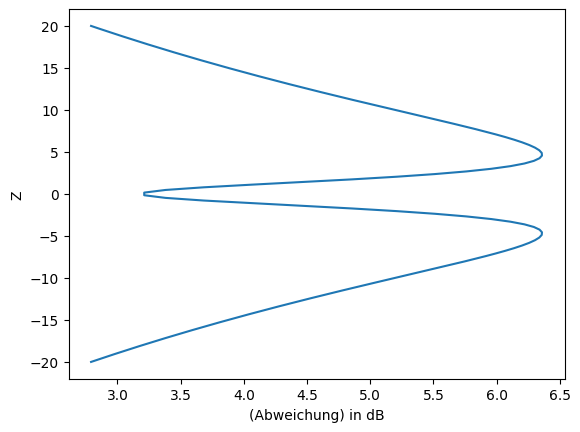

In [311]:
abweichung = np.sqrt((circuit_field_z-field_z[2])**2)

plt.plot(10*np.log10(abweichung[0,0,::]),z[0,0,::])
plt.xlabel("(Abweichung) in dB")
plt.ylabel("Z")
plt.show()

# Spule vs Stacked Ringe

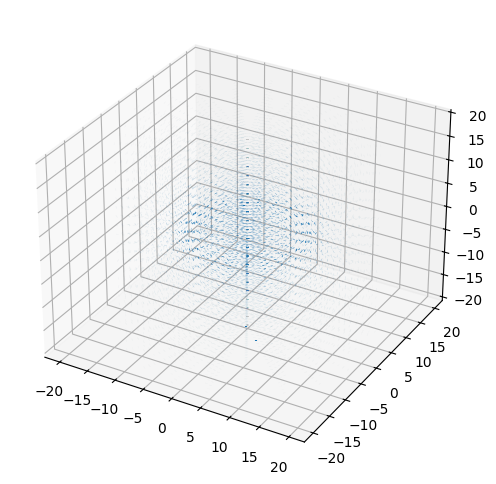

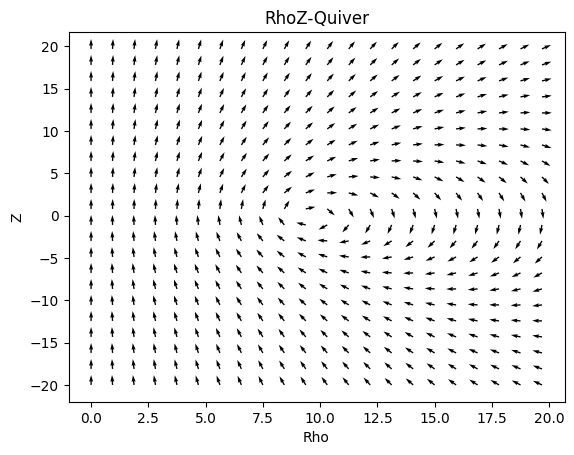

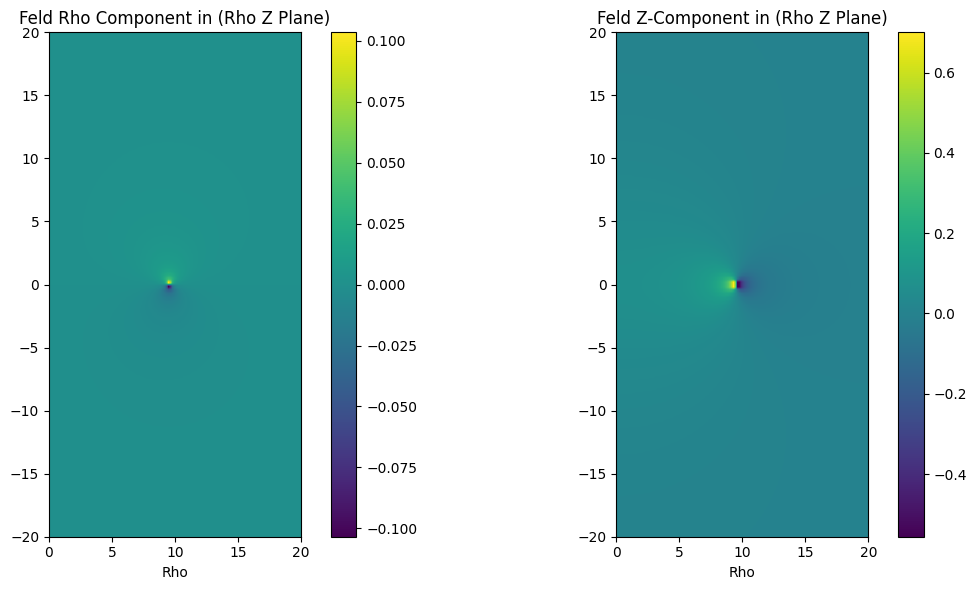

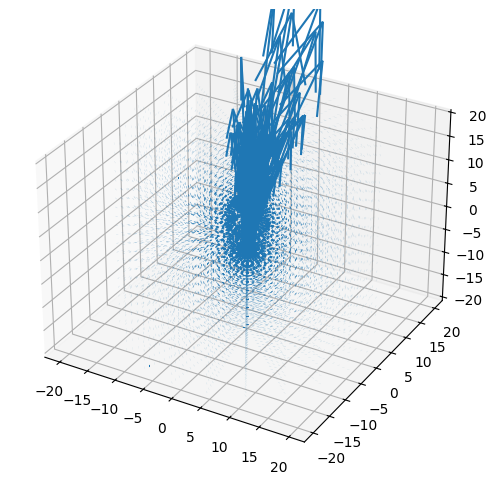

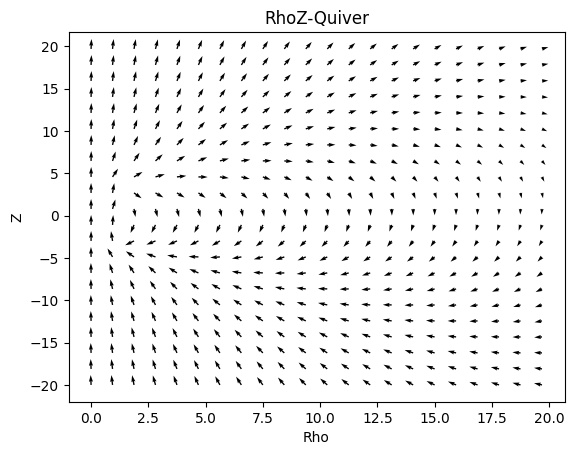

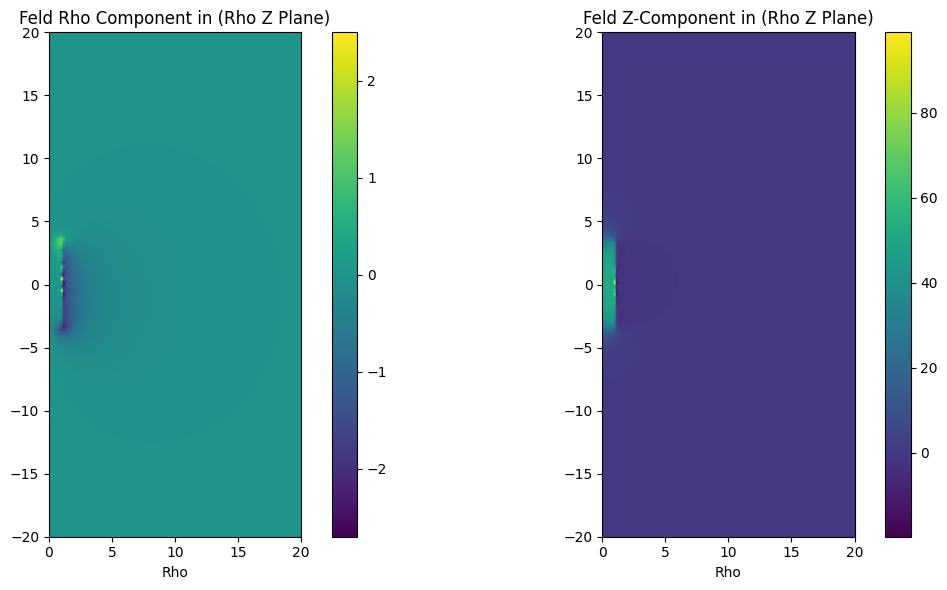

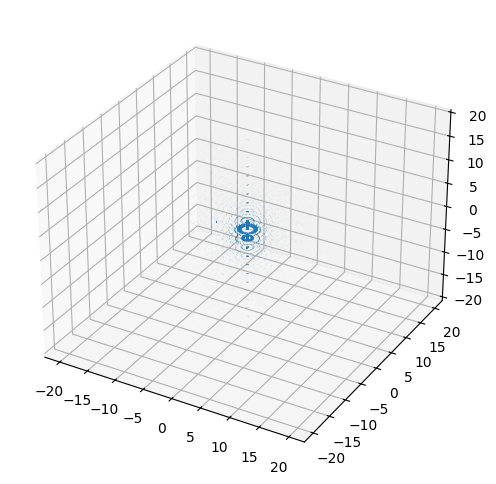

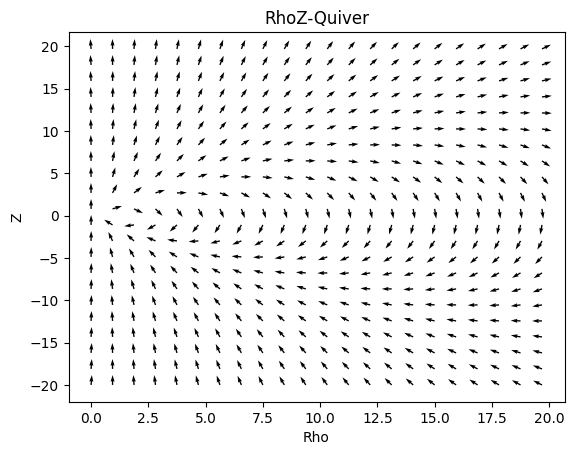

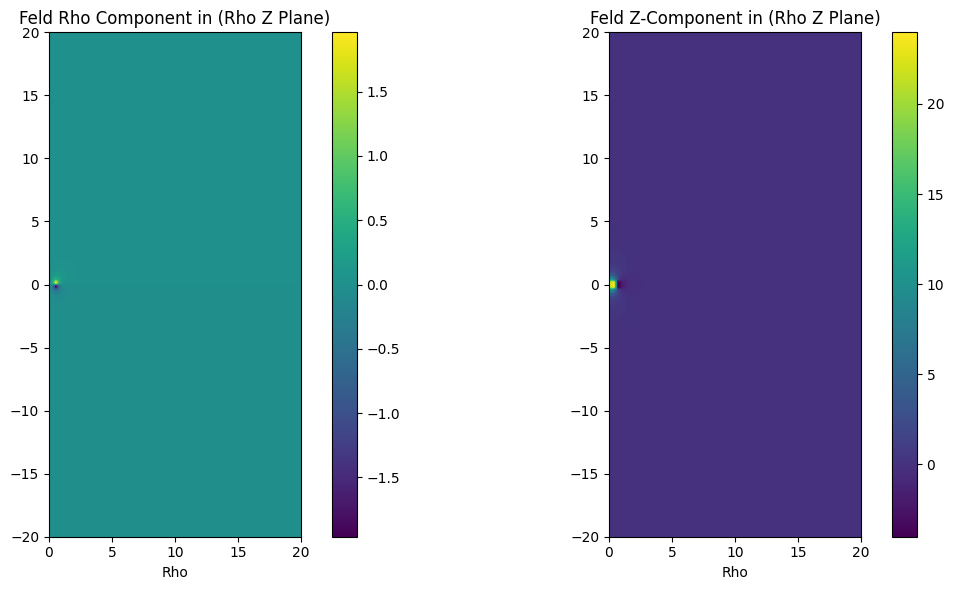

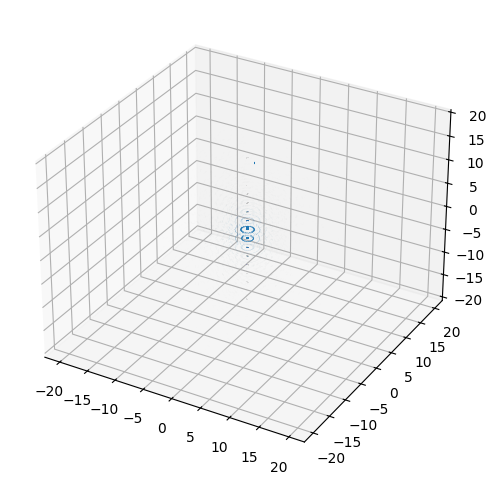

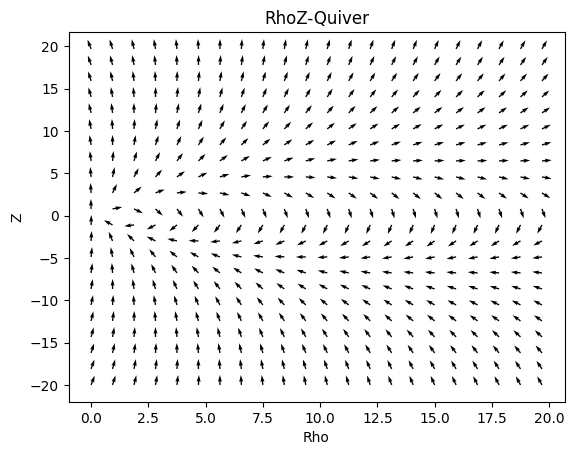

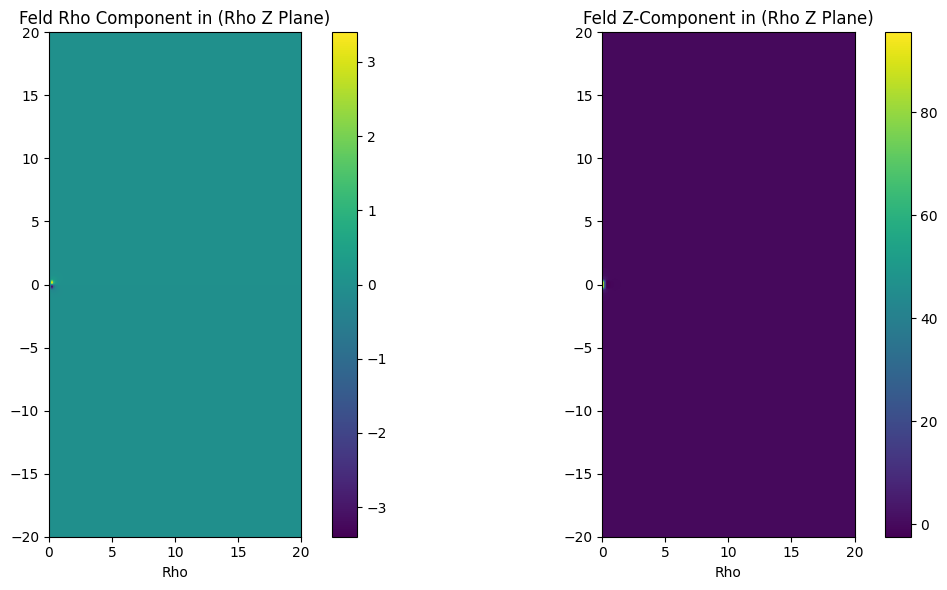

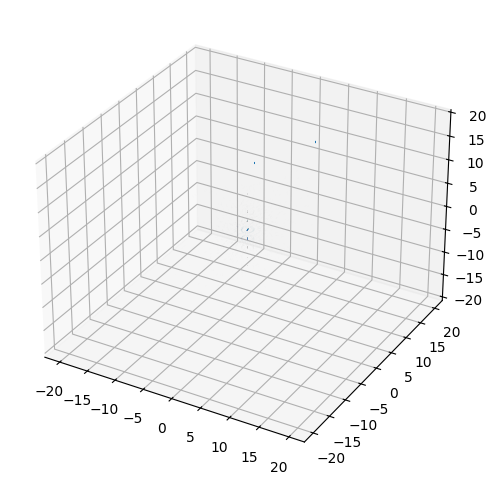

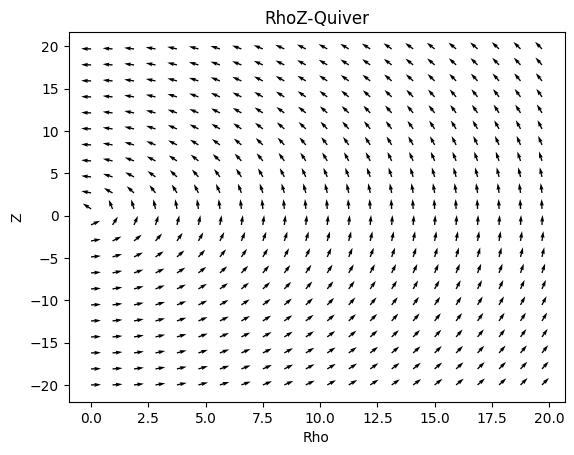

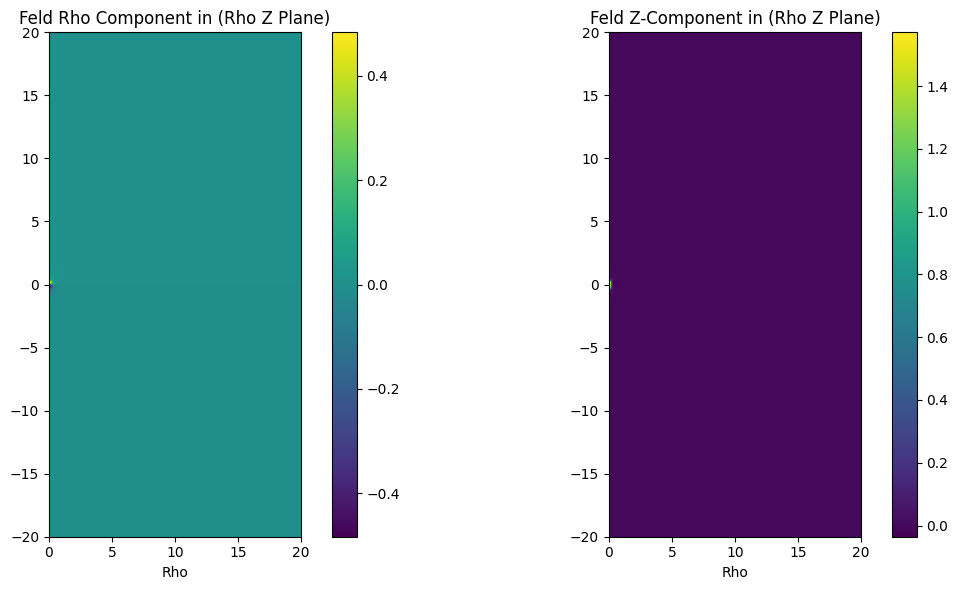

In [312]:
def spulenPlot(windungen=100,length=4,_R=1,scale=6,I=1,detail=20):
    m = length/windungen/2/np.pi
    
    longer_phi = np.linspace(-np.pi*windungen, np.pi*windungen, num=samples*4)
    
    def spule(_phi):
        return np.array([_R*np.cos(_phi),_R*np.sin(_phi),_phi*m])
    
    def j_spule(_phi):
        return np.array([-I*np.sin(_phi),I*np.cos(_phi),I*m]
                        )
    #kurve = spule(longer_phi)
    #plt.plot(kurve[0], kurve[2])
    
    field_spule = field(spule,j_spule,longer_phi)
    plot3dVectField(orts_vec,field_spule,n_arrows=detail,scale=scale)
    
    
R = 9.5 # krumme zahl damit
spulenPlot(windungen=1,length=0,_R=R,scale=50,I=1,detail=20) # Kreisstrom
spulenPlot(windungen=30,length=7,_R=1,scale=50,I=1,detail=20) # 
spulenPlot(windungen=1,length=0,scale=50,_R=0.5)
spulenPlot(windungen=1,length=0,scale=50,_R=0.1)
spulenPlot(windungen=1,length=0,_R=0.001,scale=50)


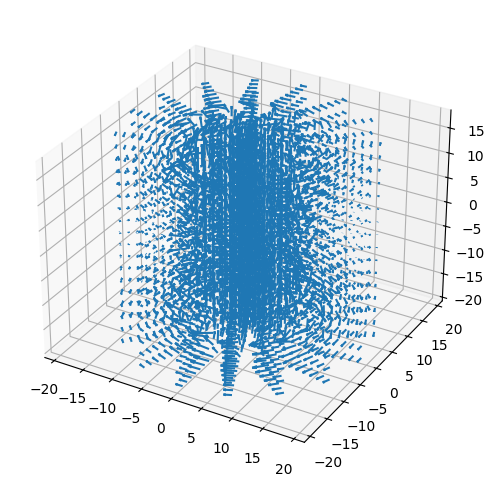

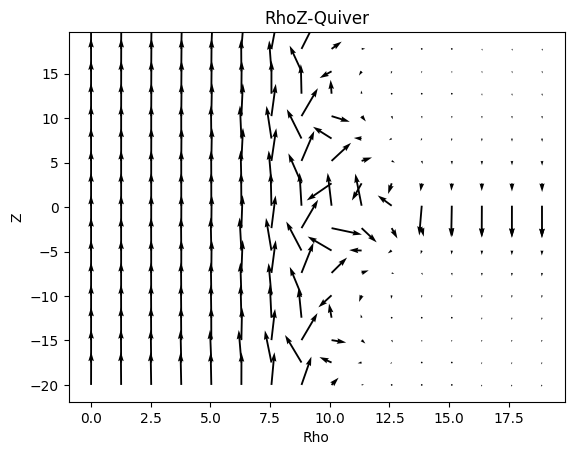

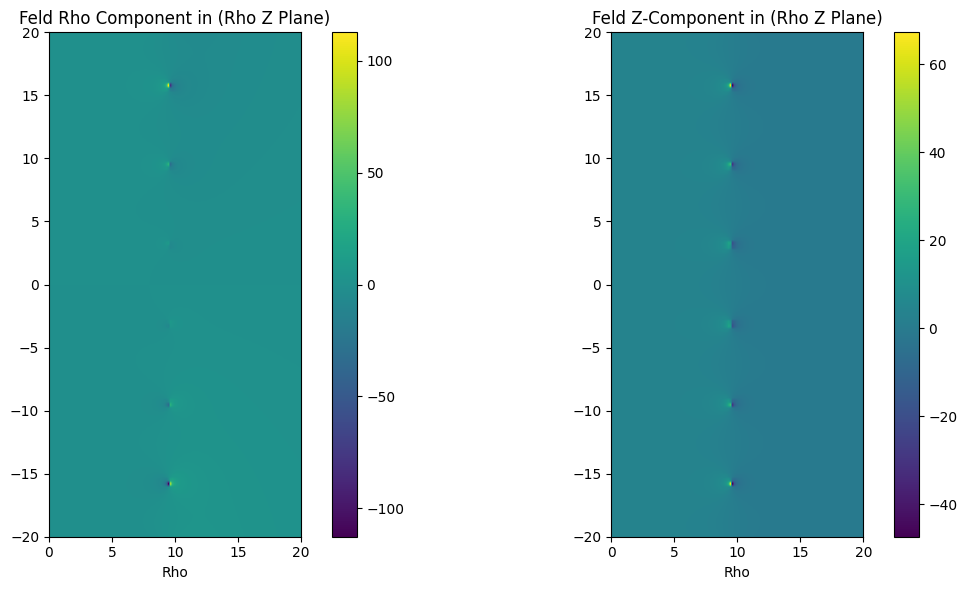

In [314]:
stacked_rings = 0
L = 10
windungen = 10


for height in np.linspace(-L/2,L/2,windungen):
    stacked_rings += field(lambda _phi: r(_phi,R,z=height), lambda _phi: j(_phi,I,z=height),phirange)

plot3dVectField(orts_vec,stacked_rings,n_arrows=15,scale=15)

### $R->0$ und $R*I=Konst$
#### Analytische Lösung

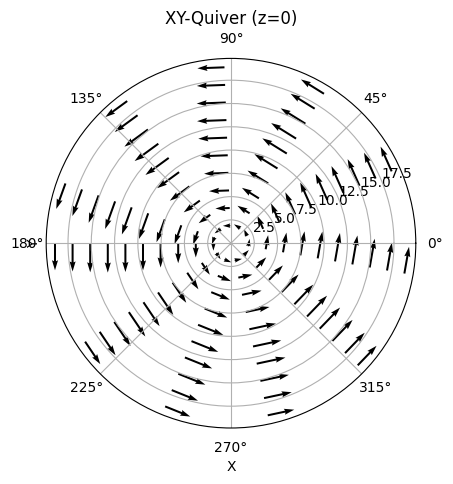

In [ ]:
def fern_feld(R=0.001): # Taylor Reihe angewendet
    u = 1
    I=1/R
    #B_rho = 3*u*I*rho*R**2/16*z*(4*rho**4+rho**2*R**2+8*rho**2*z**2+4*z**4)/(epsilon+(rho**2+z**2)**9) 
    B_rho = 3*u*I*R**2*z*rho*(4*rho**4+rho**2*R**2+8*rho**2*z**2+4*z**4)/((rho**2+z**2)**(9/2))
    #B_z = -u*I*R*(rho**6*(8-12*R)-3*rho**4*((R-4)*R**2+8*(R-1)*z**2)+12*rho**2*z**2*(R**2-(R-2)*z**2+8*z**6))/(epsilon+16*(rho**2+z**2)**(9/2))
    
    
    B_z = u*I*R*(rho**6*(8-12*R)-3*rho**4*((R-4)*R**2+8*(R-1)*z**2)+12*rho**2*z**2*(R**2-(R-2)*z**2)+8*z**6)/(16*(rho**2+z**2)**(9/2))
    plot3dVectField(orts_vec,np.array([B_rho,zero,B_z]),n_arrows=40,scale=50)


def fern_potenzial(R=0.001): # Taylor Reihe angewendet
    u = 300
    I=1/R
    #B_rho = 3*u*I*rho*R**2/16*z*(4*rho**4+rho**2*R**2+8*rho**2*z**2+4*z**4)/(epsilon+(rho**2+z**2)**9) 
    A_rho = u*I*rho*R/((rho**2+z**2)**(3/2)*4)
    #B_z = -u*I*R*(rho**6*(8-12*R)-3*rho**4*((R-4)*R**2+8*(R-1)*z**2)+12*rho**2*z**2*(R**2-(R-2)*z**2+8*z**6))/(epsilon+16*(rho**2+z**2)**(9/2))
    A_phi = np.atan2(np.cos(phi),-np.sin(phi))
    A_z = zero
    div=samples//10
    phi2 = phi[::div,::div,mid_index]
    rho2 = rho[::div,::div,mid_index]
    A_rho2 = A_rho[::div,::div,mid_index]
    A_phi2 = A_phi[::div,::div,mid_index]
    A_z2 = A_z[::div,::div,mid_index]
    def x(phi,rho):
        return rho*np.cos(phi)
    def y(phi,rho):
        return rho*np.sin(phi)
    
    myQuiver(phi2,rho2,x(A_phi2,A_rho2),y(A_phi2,A_rho2),scale=1,ax=plt.subplot(projection="polar"),xlabel="X",ylabel="Y",title="XY-Quiver (z=0)")

    #plot3dVectField(orts_vec,np.array([x(A_phi,A_rho),y(A_phi,A_rho),A_z]),n_arrows=10,scale=50)



fern_potenzial(R=0.0001)



# Fern Feld

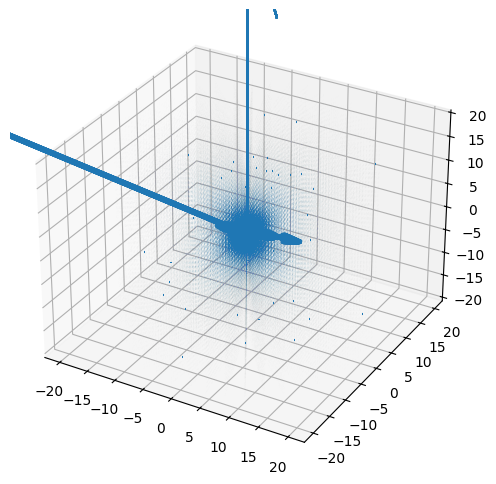

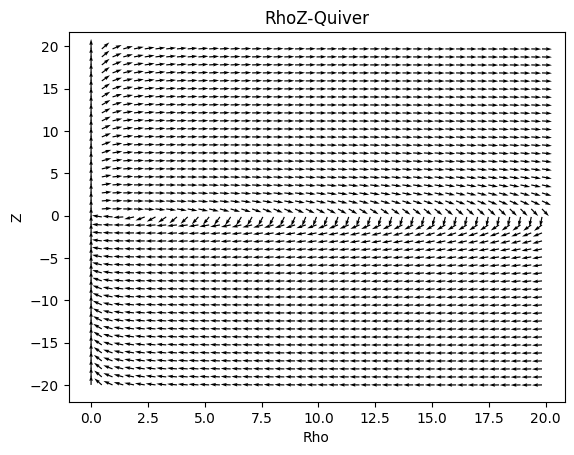

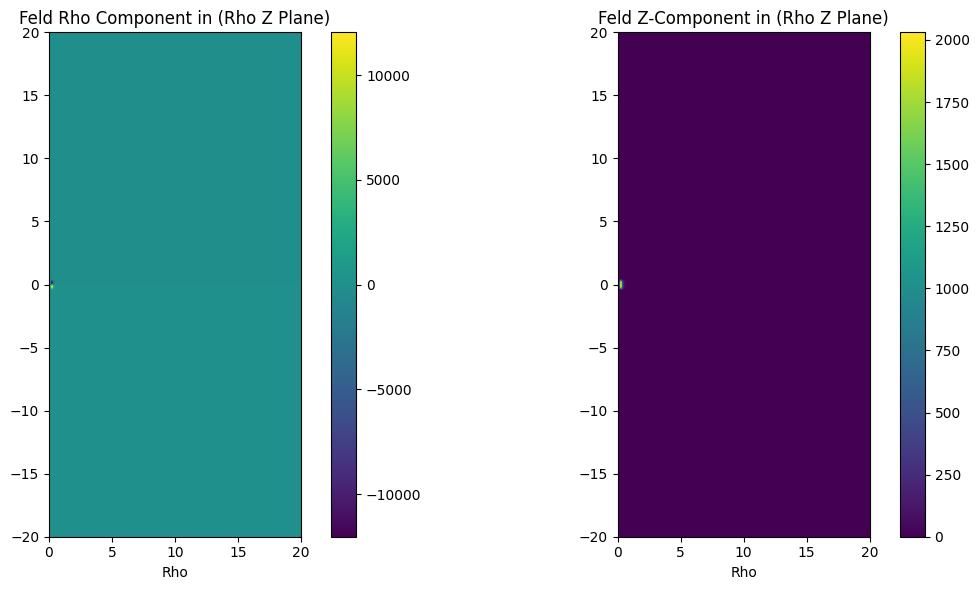

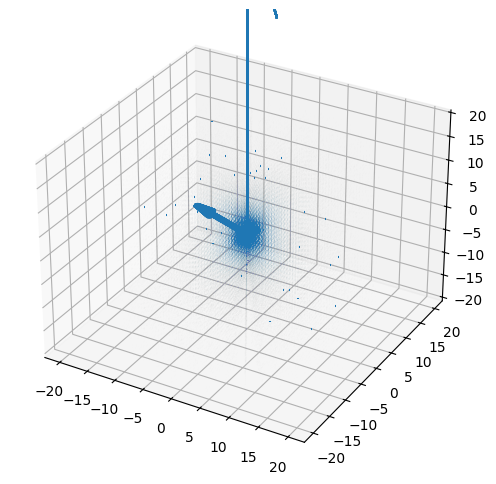

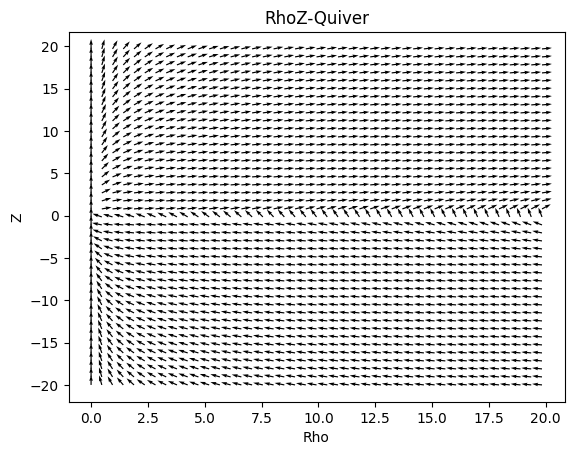

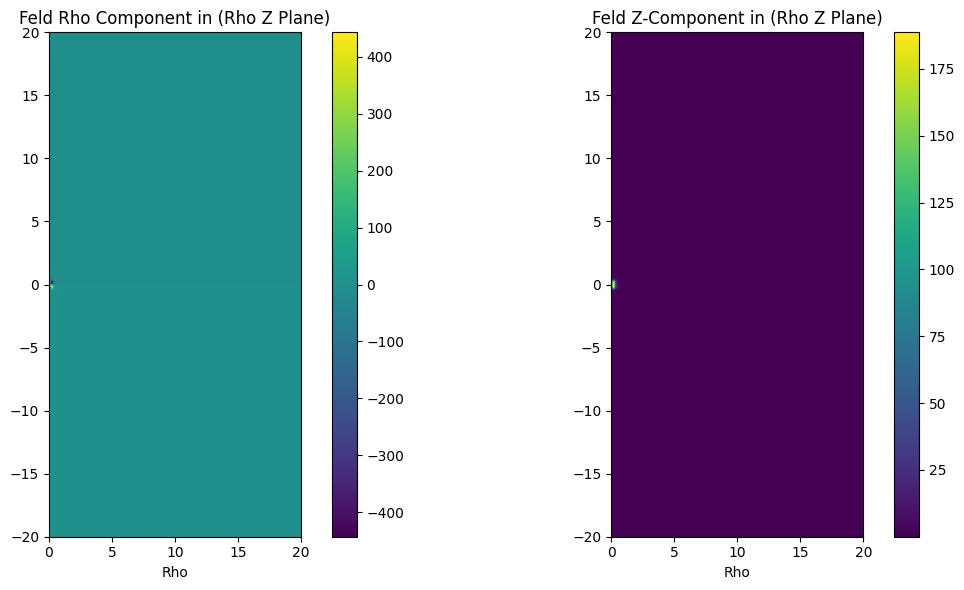

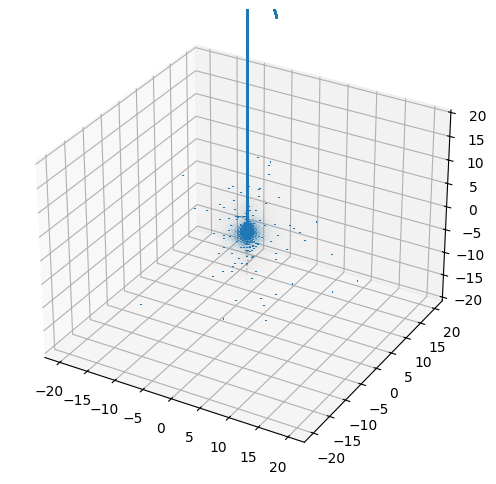

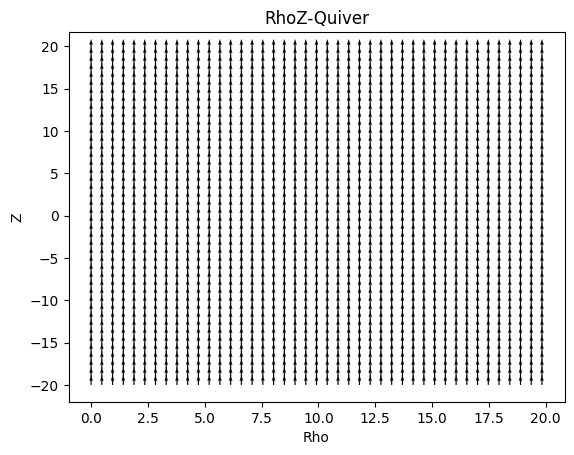

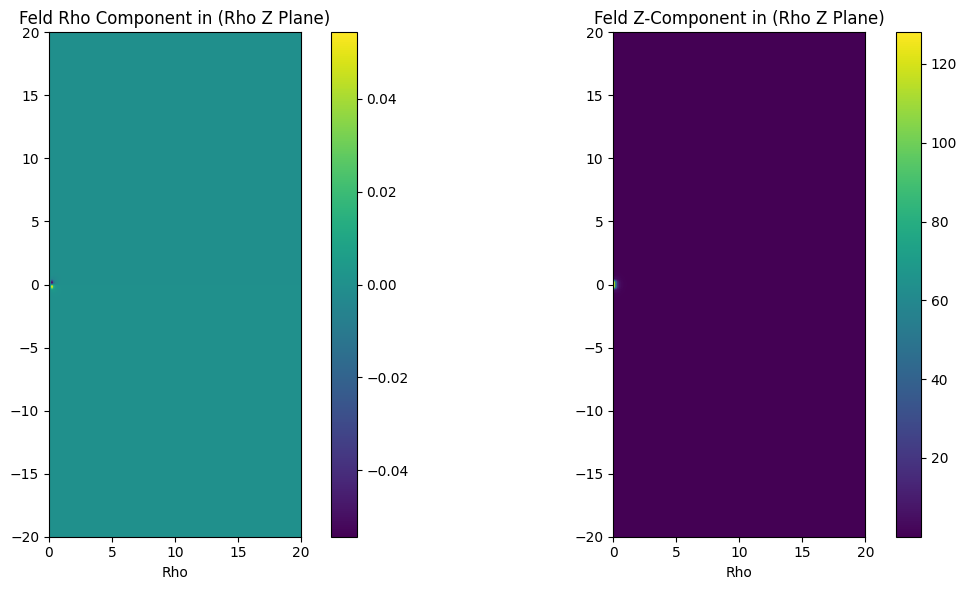

In [317]:

fern_feld(R=2)

fern_feld(R=0.5)

fern_feld(R=0.0001)


# Analytisch R*I=1 R->0

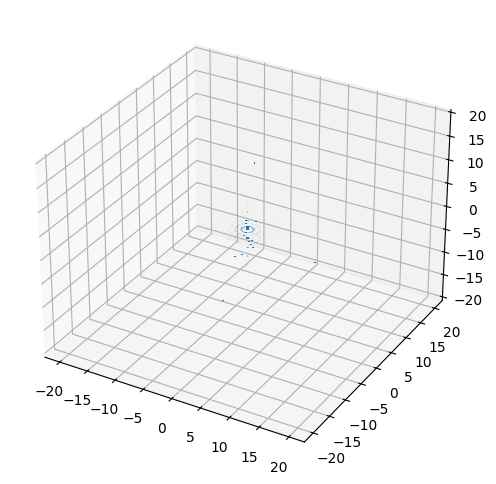

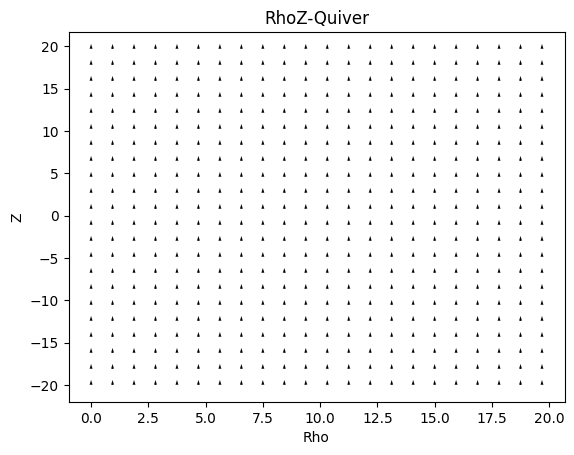

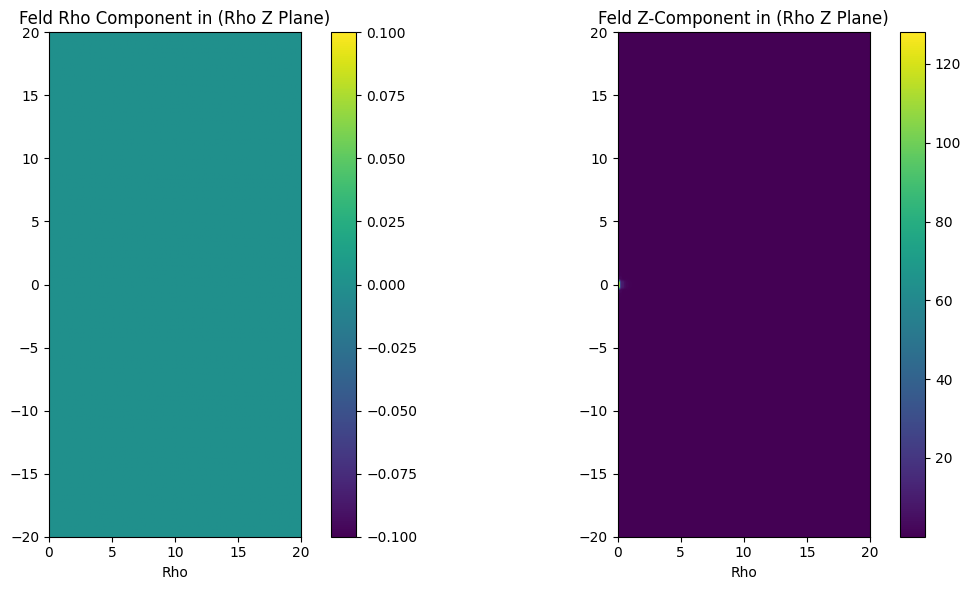

In [ ]:
def fern_feld_r0():
    u = 1
    B_rho = zero
    B_z= u*( rho**6*8 + 24*rho**4 *z** 2+ 24* rho**2*z**4 +8*z**6)/(16*(rho**2+z**2)**(9/2))
    plot3dVectField(orts_vec,np.array([B_rho,zero,B_z]),n_arrows=20,scale=100)
fern_feld_r0()


## 1 Analytische Lösung

Idealisierungen:
* unendlich dünner Leiter
* ringförmiger Leiter
* endlicher Radius
* Bestimmung des magnetischen Potenzials und des magnetischen Feldes nur auf der Symmetrieachse. (Sven)

### 1.1 Herleitung

* siehe Vorlesung
* magnetisches Potenzial
* magnetisches Feld
* in Zylinderkoordinaten
* Lösung auf der Achse in möglichst einfacher Form


**Poisson-Gleichung**
$$
\Delta \vec{A} = -\mu \vec{j}
$$

**Lösung**
$$
\vec{A}(\vec{r}) = \frac{\mu}{4\pi} \iiint \frac{\vec{j}(\vec{r}')}{|\vec{r} - \vec{r}'|} dV'
$$

Der Strom verläuft auf einer Kreisbahn mit Radius $R$. Die Kurve kann durch $\vec{r}(\varphi) = \begin{pmatrix} R \cos(\varphi) \\ R \sin(\varphi) \\ 0 \end{pmatrix}$ beschrieben werden. Die Stromdichte ist konstant und beträgt $I$.

Um das Magnetische Potenzial $\vec{A}$ zu berechnen, müssen wir für jeden Punkt im Raum die durchschnittliche Flussrichtung des Stroms gewichtet mit dem kehrwert des Abstandes berechnen. Dazu integrieren wir über die gesamte Kreisbahn.

$\vec{A}= \frac{\mu_0}{4\pi} \int_0^{2\pi} \frac{I}{R} \begin{pmatrix} -\sin(\varphi) \\ \cos(\varphi) \\ 0 \end{pmatrix} d\varphi$



### 1.2 Visualisierung

* magnetisches Potenzial
* $z$-Komponente des magnetischen Feldes

## 2 Numerische Lösung

### 2.1 Herleitung

* Formeln zur numerischen Berechnung in beliebigem Raumpunkt
    * magnetisches Potenzial: aus der Quellendarstellung
    * magnetisches Feld: aus dem Potenzial
* alles in Zylinderkoordinaten
* Rotationssymmetrie ausnutzen

### 2.2 Berechnung

* Wahl des Integrationsverfahrens
* Wahl des Samplings

### 2.3 Visualisierung

* magnetisches Potenzial
* alle Komponenten des magnetischen Feldes (Raphael)
* alles in Zylinderkoodinaten
* Rotationssymmetrie ausnutzen
* geeignete zweidimensionale Schnitte (zx achse y=0 y=-3)
* freie Wahl der Bibliothek zum Plotten
    * [Matplotlib](https://matplotlib.org/)
    * [Seaborn](https://seaborn.pydata.org/)
    * [Plotly](https://plotly.com/)
    * [Bokeh](https://bokeh.org/)
    * ...

## 3 Vergleich analytische und numerische Lösung

* Bestimmung des relativen Fehlers
* auf der Symmetrieachse
* magnetisches Potenzial
* $z$-Komponente des magnetischen Feldes
* Visualisierung wie bei der analytischen Lösung
* logarithmisch darstellen

## 4 Verallgemeinerung

* Spule
    * $N$ Windungen
    * Länge $L$
* magnetisches Potenzial und magnetisches Feld
* Vorgehen bei numerischer Berechnung und Visualisierung wie oben

### Fakultativ
* Ringstrom
    * Recherche analytische Lösung (falls möglich, kann kompliziert werden!)
    * Grenzübergang $R\to0$ und Vergleich mit infinitesimalem magnetischem Dipol
        * analytisch
        * numerisch
* Spule
    * Vergleich mit $N$ im Abstand $L/N$ aneinandergereihten Kreisströmen
    * Vergleich mit anderem Team: zylindrischer Permanentmagnet

## 5 Ausblick:  Zeitlich veränderlicher Strom

Idealisierungen:
* unendlich dünner Leiter
* ringförmiger Leiter
* endlicher Radius
* Bestimmung des magnetischen Potenzials und des magnetischen Feldes nur auf der Symmetrieachse.

Verallgemeinerung: *zeitlich veränderlicher* Strom
* quasistatischer Fall
* dynamischer Fall

Nur eine kurze Beschreibung dessen, was zur Bestimmung des zeitlich veränderlichen magnetischen Feldes zu tun wäre - insbesondere ein paar Worte zu den erwarteten Hürden in Bezug auf:
* Zeitkomplexität
* Speicherbedarf
* Genauigkeit